<h1 style=" font-size: 40px">Mutual Information Project</h1>
<p style="font-family: NewTimesRoman; font-size: 20px">Parsa Mohammadpour</p>

First we install packages that we are going to use in this project

In [1]:
! pip install scikit-learn numpy pandas matplotlib seaborn 


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Step 1: Implement Entropy

### Question:

**Entropy** is a measure of the uncertainty or randomness in a probability distribution. For a discrete random variable $ X $ with possible outcomes $ x_1, x_2, \dots, x_n $ and corresponding probabilities $ P(x_1), P(x_2), \dots, P(x_n) $, the entropy $ H(X) $ is defined as:

$$
H(X) = -\sum_{i=1}^{n} P(x_i) \log_2 P(x_i)
$$

**Task:** Write a Python function `entropy(probabilities)` that takes a list of probabilities and returns the entropy of the distribution.

```python
import numpy as np

def entropy(probabilities):
    # Your code here
    pass
``` 


### Answer:

#### **Entropy Explained Step by Step**
To explain entropy, first, we start with the meaning of surprise, then we give a formula for it and we explain the formula and at the end, we define entropy as the expected value of surprise.

##### **Surprise: The Core Idea**  
Surprise means that how less likely an event is, the more surprised we are when it happens. Conversely, if something is very predictable, it doesn’t surprise us much, but when something has a few probability, its occurrence surprises us a lot.

For example:  
- Someone telling you the sun will rise tomorrow → We know that it will happen, so we have **zero surprise (certainty).**
- Flipping a fair coin and getting heads → The probability is $p=1/2$ so when it happens, it is **not very surprising**.
- Rolling a die and getting a **six** twice in a row → The probability is $p=1/36$ so when it happens, it is **more surprising**.  

So now that we have the definition of concept we need a mathematical formula to measure **how surprising** an event is.

---

##### **Measuring Surprise (mathematical formula)**
As we explained in the previous section, we can guess that surprise has an inverse relation with surprise. so we can somehow say that surprise (s) is $s~1/p$, so we can expect something like that in the formula. We also want to be surprised twice to see two six in rolling a fair die in comparison to see six in a single roll. We also know a function that has this property, the $\style{italic}log$ function.
So, to sum up these things, we define surprise as a function of the probability of an event with the following formula:

$$S(p) = \log{\frac{1}{p}} = -\log p$$

Now, in this function, we have some properties that we mention some of them:
- **Lower probability means higher surprise**  
   We know that logarithm is an increasing function so when probability increases, we have less value in the logarithm, so the overall value decreases.

- **Multiplicative probabilities become additive surprises**  
   If two independent events happen with probabilities \( p_1 \) and \( p_2 \), their combined probability is \( p_1 \times p_2 \).

- **Choice of logarithm base:**  
   - Base **2** → Surprise measured in **bits** (used in information theory). We use this basis everywhere in this file.
   - Base **e** → Measured in **nats** (natural logarithm, useful in physics/statistics).
   - Base **10** → Measured in **Hartleys** (less common).

---

##### **Entropy: Expected Surprise**  
Now, surprise is defined for **a single event** with the provided **probability**, but now we want to measure surprise for all events. Now, we define **Entropy** as the  **average measure of surprise** across all possible outcomes.

Since we need an **expected value**, the entropy $H(x)$ for a discrete random variable is:

$$H(X) = \mathbb{E}[S(p)] = \sum_{i} p(x_i) S(p(x_i))$$

combining with $S(p) = -\log p$ , we have:

$$
H(X) = -\sum_{i} p(x_i) \log p(x_i) = \sum_{i} p(x_i) \log {\frac{1}{p(x_i)}}
$$

Now that we have the definition, we define the Python function to compute it for us as follows:

In [2]:
import numpy as np

def entropy(probabilities) -> float:
    filtered_probabilities = list(filter(lambda x: x != 0, probabilities))
    prob_logs = np.log2(filtered_probabilities)
    events_surprise_neg = [p*s for p, s in zip(filtered_probabilities, prob_logs)]
    return -sum(events_surprise_neg)

Let's have a look and test the function to see if it works right.<br>
We give the function as input, the following list: <br>
$probabilities=[0.5, 0.25, 0.25]$<br>
we expect the following result: <br>
$-(0.5 * log_2 2 + 0.25 * log_2 4 + 0.25 * log_2 4) = -(-0.5 - .5 - 0.5) = 1.5$

In [3]:
prob = [0.5, 0.25, 0.25]
expected_res = 1.5
res = entropy(prob)
print(f'calculated result is: {res} \t expected result is: {expected_res} \t result is: {res==expected_res}')

calculated result is: 1.5 	 expected result is: 1.5 	 result is: True


# Step 2: Implement Mutual Information

### Question:

**Mutual Information** measures the amount of information obtained about one random variable through another random variable. For two discrete random variables $ X $ and $ Y $, the mutual information $ I(X; Y) $ is defined as:

$$
I(X; Y) = \sum_{x \in X} \sum_{y \in Y} P(x, y) \log_2 \left( \frac{P(x, y)}{P(x)P(y)} \right)
$$

**Task:** Write a Python function `mutual_information(joint_prob, marginal_x, marginal_y)` that computes the mutual information between two random variables $ X $ and $ Y $.

```python
def mutual_information(joint_prob, marginal_x, marginal_y):
    # Your code here
    pass
```


### Answer

To explain the mutual information, first, we go through the cross entropy concept. Then we will explain the KL-Divergence and then we explain mutual information and write the code.

##### **Cross entropy**
Cross entropy is a measure of the difference between two probability distributions. Suppose we have two distributions, $p(s)$ which is the correct distribution, and another distribution $q(x)$. We want to measure the difference between these two distributions. (for example,e we have another distribution $r(x)$ and we want to see which of the distributions ($q(x)$ and $r(x)$) are better match (fit) for the distribution $p(x)$, in other words, which of them is closer to the $p(x)$ distribution. This concept has a lot of use cases in machine learning and other fields.
So we define the following Formula for the cross entropy $H$ between two distibutions$p(x)$ and $q(x)$:
$$H(p,q) = - E_p[\log q]$$

- ##### **Cross entropy and Entropy**
    If we look closer at the definition of cross-entropy and entropy, we can understand that they are somehow the same but cross-entropy uses another distribution for the surprise function. In other words, it calculates the expected value of each element of the $\ohm$ with the given distribution instead of the right distribution, and by trying to minimize their difference, this can be used in optimization and machine learning as the loss function.

- ##### **cross-entropy value limit**
    Of course, there is a limit to how we can reduce the value of the cross-entropy. It can be proven that the minimum value for the cross-entropy of a distribution by any other distribution, is always greater than or equal to the cross-entropy of a distribution, with itself:

$$H(p,q) = - E_p[\log q]$$
$$H(p,p) = - E_p[\log p] = H(p)$$
$$H(p,p) \leq H(p,q)$$

- ##### **KL-Divergence**
  In the previous section, in the formula, we said that there is a limit for the least amount of the cross-entropy value and showed the value. now if we calculate the difference of the cross-entropy between $p$ and $q$ with cross-entropy of $p$ and $p$ (or simply saying, the entropy of $p$) we can have the value that its least reachable value is zero. This value is called **Kullback-Leibler Divergence**:
$$D_{KL}(p||q) = H(p,q) - H(p) = \sum_{x}p(x) \log{\left( \frac {p(x)}{q(x)} \right)}$$


- ##### **joint cross-entropy**
  In the previous section, in the formula, we used a single variate distribution. But all the things that we said, are true for the joint distribution. We can define the **joint cross-entropy** as follows:

$$H(p_{XY} (x,y),q_{XY} (x,y)) = - E_{p_{XY}} [\log q_{XY}]$$


##### **mutual information**
Suppose that we have a joint distribution over $X$ and $Y$ random variables, we want to see how related these two random variables are. In other words, we want to see how dependent are these two random variables. From previous sections, we know that the difference between two distributions can be measured using the **cross-entropy** and **KL-Divergence**, and from the previous knowledge, we know that if two random variables are independent, we can write their joint distribution, as the multiplication of the distribution of each one of them ($p_XY(x,y) = p_X(x) p_Y(y)$). So, now if we calculate the KL-Divergence formula for them in order to find their difference, the difference between the joint distribution of them and the distribution of them if they were independent. so we can reach the following formula:

$$I(X; Y) = D_{KL}(p_{XY}(x,y) || p_X(x)p_Y(y)) = \sum_{x,y} p(x,y) \log{\left(\frac{p_{XY}(x,y)}{p_X(x)p_Y(y)}\right)}$$

<br>
Now lets go to the implementation of the `mutual_information` function.

In [4]:
def mutual_information(joint_prob, marginal_x, marginal_y):
    def calculation_mi(joint, x, y):
        return joint * np.log2(joint/(x*y)) if 0 not in [joint, x, y] else 0
    mi_list = [calculation_mi(joint_prob[i][j],marginal_x[i],marginal_y[j]) for i in range(len(marginal_x)) for j in range(len(marginal_y))]
    return sum(mi_list)

Let's have a look and test the function to see if it works right.<br>
We give the function as input, the following list: <br>
$joint-prob: [[1/8, 2/8], [2/8, 1/8], [1/8, 1/8]]$<br>
$marginal-x: [2/4, 1/4, 1/4]$<br>
$marginal-y: [1/2, 1/2]$<br>
<br>
we expect the following result: <br>
$\frac{1}{8} * log_2 \left(\frac{\frac{1}{8}}{\frac{2}{4}*\frac{1}{2}}\right) + 
\frac{2}{8} * log_2 \left(\frac{\frac{2}{8}}{\frac{2}{4}*\frac{1}{2}}\right) + 
\frac{2}{8} * log_2 \left(\frac{\frac{2}{8}}{\frac{1}{4}*\frac{1}{2}}\right) + 
\frac{1}{8} * log_2 \left(\frac{\frac{1}{8}}{\frac{1}{4}*\frac{1}{2}}\right) + 
\frac{1}{8} * log_2 \left(\frac{\frac{1}{8}}{\frac{1}{4}*\frac{1}{2}}\right) + 
\frac{1}{8} * log_2 \left(\frac{\frac{1}{8}}{\frac{1}{4}*\frac{1}{2}}\right) = - \frac{1}{8} + 0 + \frac{2}{8} + 0 + 0 + 0 = \frac{1}{8}$

In [5]:
joint = [[1/8, 2/8], [2/8, 1/8], [1/8, 1/8]]
marginal_x = [2/4, 1/4, 1/4]
marginal_y = [1/2, 1/2]
res = mutual_information(joint, marginal_x, marginal_y)
expected_res = 1/8
print(f'calculated result is: {res} \t expected result is: {expected_res} \t result is: {res==expected_res}')

calculated result is: 0.125 	 expected result is: 0.125 	 result is: True


# Step 3: Implement Kullback-Leibler Divergence

### Question:

**Kullback-Leibler (KL) Divergence** measures how one probability distribution diverges from a second, reference probability distribution. For two discrete probability distributions $ P $ and $ Q $, the KL divergence $ D_{KL}(P \| Q) $ is defined as:

$$
D_{KL}(P \| Q) = \sum_{i} P(i) \log_2 \left( \frac{P(i)}{Q(i)} \right)
$$

**Task:** Write a Python function `kl_divergence(p, q)` that computes the KL divergence between two probability distributions $ P $ and $ Q $.

```python
def kl_divergence(p, q):
    # Your code here
    pass
```


### Answer

We have explained the **Kullback-Leibler (KL) Divergence** in the previous part, but here we put the formula again and complete the function. At the end, we check our function with the simple input again to see if it works right or not.


##### **Kullback-Leibler (KL) Divergence**
In the previous section, in the formula, we said that there is a limit for the least amount of the cross-entropy value and showed the value. now if we calculate the difference of the cross-entropy between $p$ and $q$ with cross-entropy of $p$ and $p$ (or simply saying, the entropy of $p$) we can have the value that its least reachable value is zero. This value is called **Kullback-Leibler Divergence**:
$$D_{KL}(p||q) = H(p,q) - H(p) = \sum_{x}p(x) \log{\left( \frac {p(x)}{q(x)} \right)}$$


<br>
Now let's go to the implementation of the `mutual_information` function.

In [6]:
def kl_divergence(p, q):
    kld_list = [p_i*np.log2(p_i/q_i) for p_i, q_i in zip(p, q)]
    return sum(kld_list)

Now we test our function. we give as input values: <br>
$p: [1/8, 1/2, 1/8, 1/4]$ <br>
$q: [1/4, 1/2, 1/8, 1/8]$ <br>
We expect the answer to be:<br>
$D_{KL}(p||q) = 
\frac{1}{8} * \log \left( \frac{\frac{1}{8}}{\frac{1}{4}} \right) + 
\frac{1}{2} * \log \left( \frac{\frac{1}{2}}{\frac{1}{2}} \right) + 
\frac{1}{8} * \log \left( \frac{\frac{1}{8}}{\frac{1}{8}} \right) + 
\frac{1}{4} * \log \left( \frac{\frac{1}{4}}{\frac{1}{8}} \right) = -\frac{1}{8} + 0 + 0 + \frac{1}{4} = \frac{1}{8}$

In [7]:
p_dis = [1/8, 1/2, 1/8, 1/4]
q_dis = [1/4, 1/2, 1/8, 1/8]
res = kl_divergence(p_dis, q_dis)
expected_res = 1/8
print(f'calculated result is: {res} \t expected result is: {expected_res} \t result is: {res==expected_res}')

calculated result is: 0.125 	 expected result is: 0.125 	 result is: True


# Step 4: Apply Your Functions to Real Data

## Question:

**Story:** Imagine you are a data scientist working for a botanical research institute. Your team has collected data on various iris flowers, including measurements of sepal length, sepal width, petal length, and petal width. The dataset also includes the species of each iris flower (setosa, versicolor, or virginica).

Your task is to analyze this dataset using the concepts of entropy, mutual information, and KL divergence to gain insights into the relationships between the different features and the species of the flowers.

**Dataset:** You will use the famous Iris dataset, which is available in the `sklearn.datasets` module.

**Tasks:**

1. **Compute Entropy of a Feature:**
   - Choose one of the features (e.g., sepal length) and compute its entropy. This will give you a measure of the uncertainty or randomness in the distribution of that feature.

2. **Compute Mutual Information Between Two Features:**
   - Select two features (e.g., sepal length and petal length) and compute the mutual information between them. This will tell you how much information one feature provides about the other.

3. **Compute KL Divergence Between Two Distributions:**
   - Compare the distribution of a feature (e.g., sepal length) for two different species (e.g., setosa and versicolor) using KL divergence. This will give you a measure of how different the two distributions are.

```python
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Compute entropy for one of the features
probabilities = df['sepal length (cm)'].value_counts(normalize=True)
entropy_value = entropy(probabilities)
print(f"Entropy of sepal length: {entropy_value}")

# Compute mutual information between two features
# (You will need to compute the joint and marginal probabilities first)

# Compute KL divergence between two distributions
# (You will need to define two probability distributions first)
```


## Answer:

First we fetch the data from the dataset and get some information about it and visualize it. Then we go through the tasks, step by step.

#### data set

Here we get the dataset and Now we get some information about this dataset

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species-name'] = data.target_names[df['species']]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species-name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


##### getting information & visualization

number of row's and column's of dataset

In [9]:
df.shape

(150, 6)

getting some information about null counts and data types of each columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species-name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Getting each column count, mean, std and ...

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### visulization

plotting pair plots, containint all possible x axis and y axis of all 

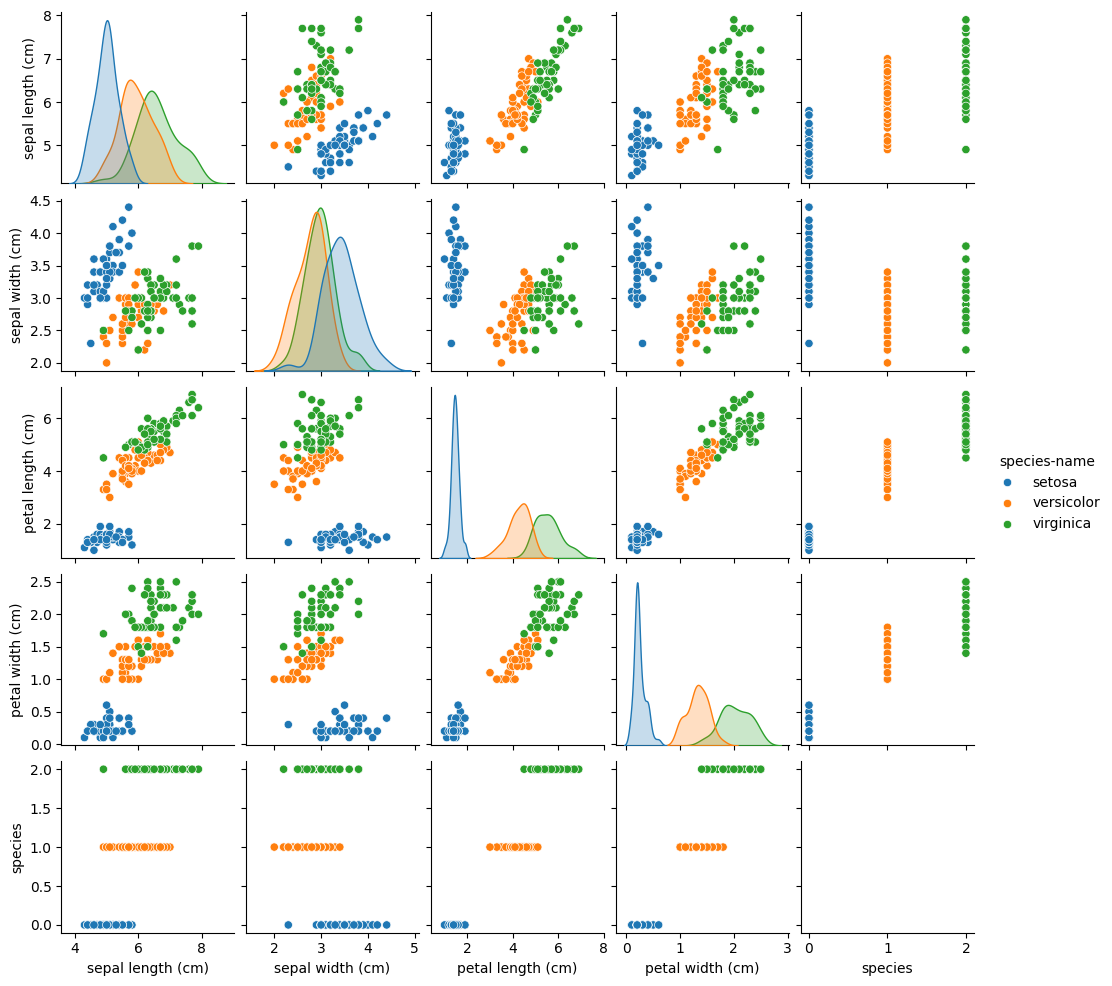

In [12]:
import seaborn as sns

sns.pairplot(df, hue='species-name', height=2)

another function, in more detailed view

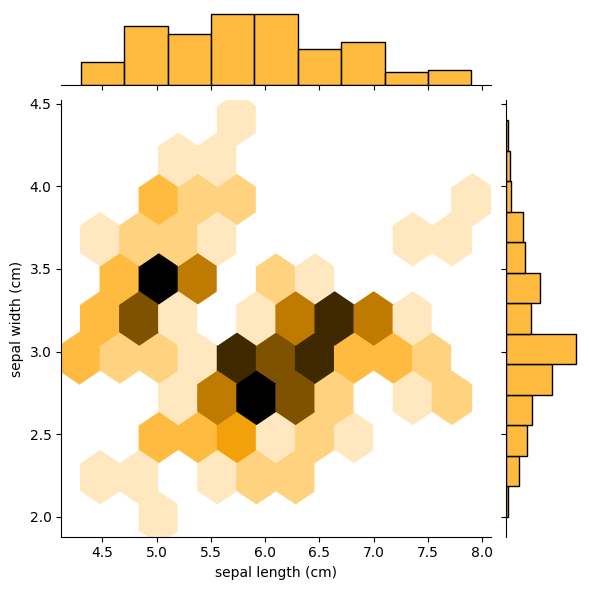

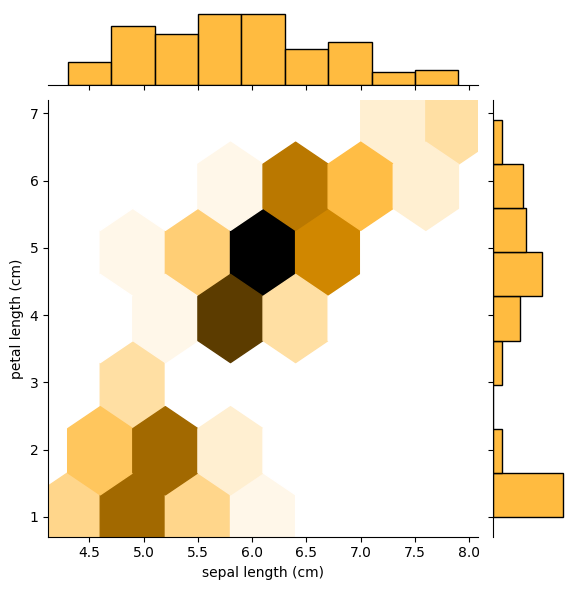

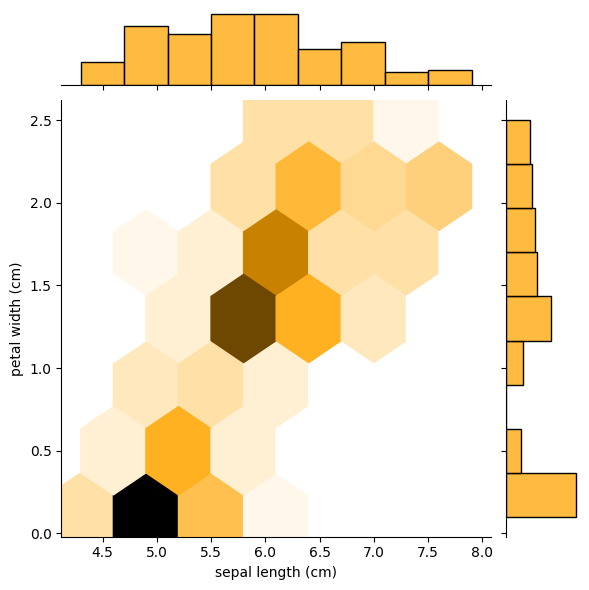

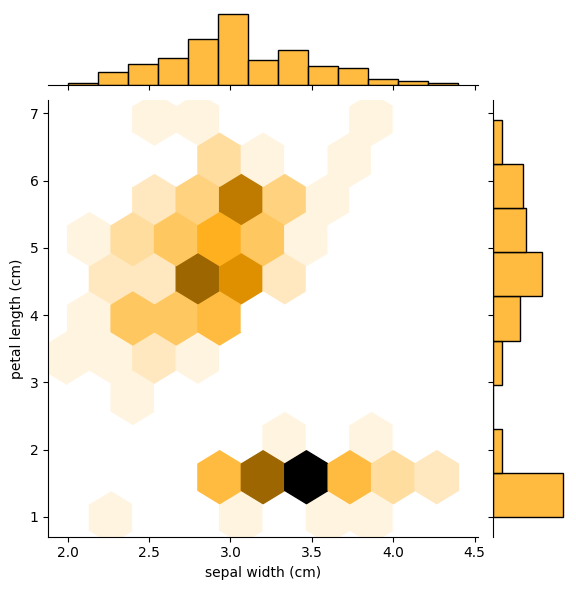

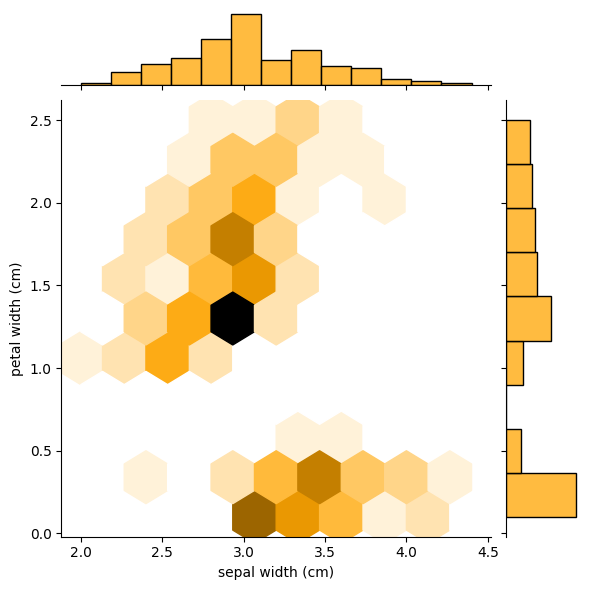

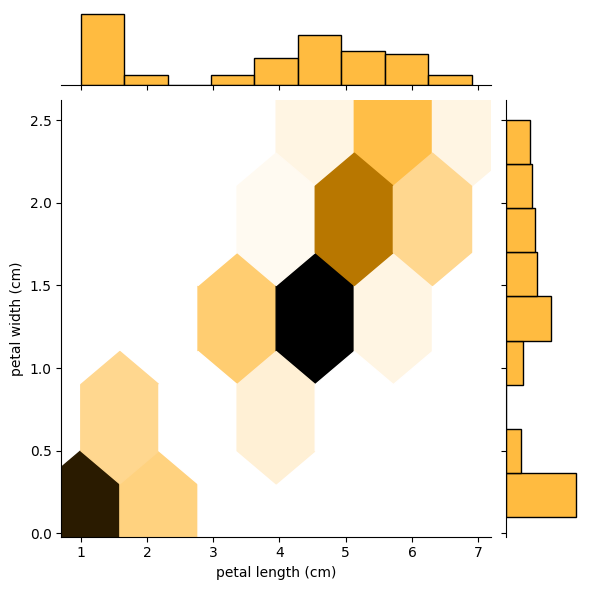

In [13]:
import itertools

columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
col_pairs = list(itertools.combinations(columns, 2))
for pair in col_pairs:
    sns.jointplot(x=pair[0], y=pair[1], data=df, kind='hex', color='orange')

another function, in more detailed view

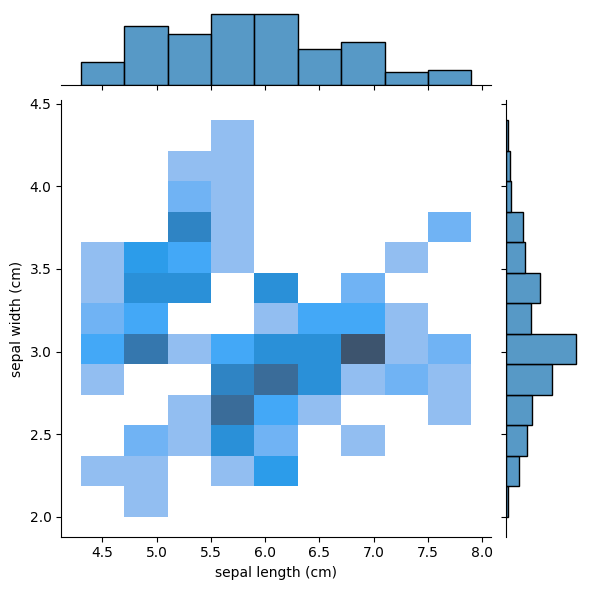

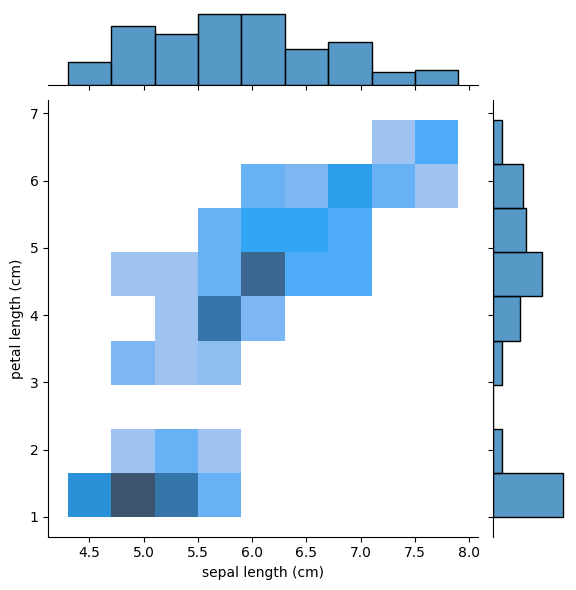

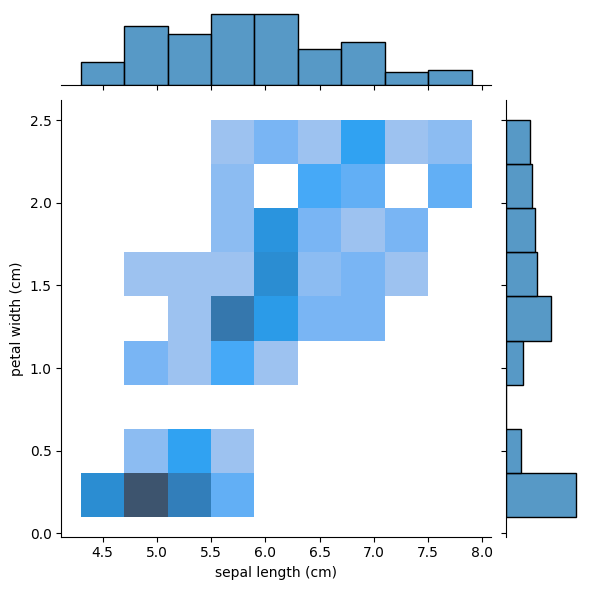

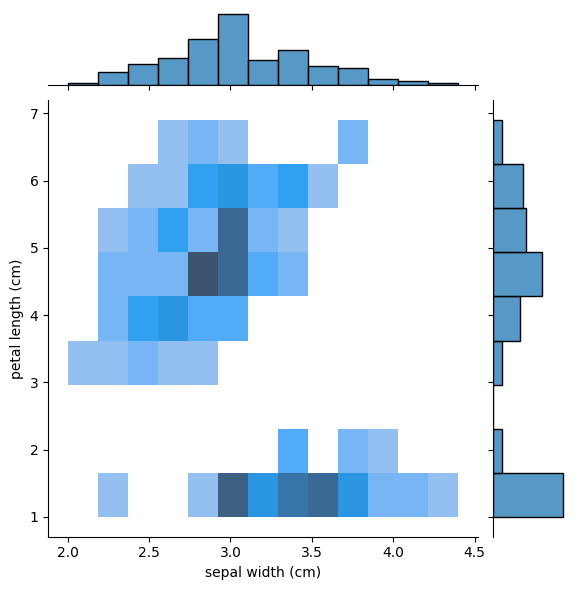

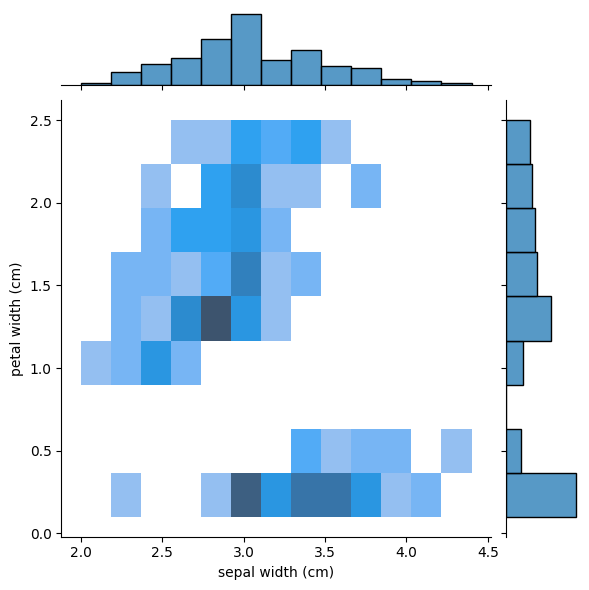

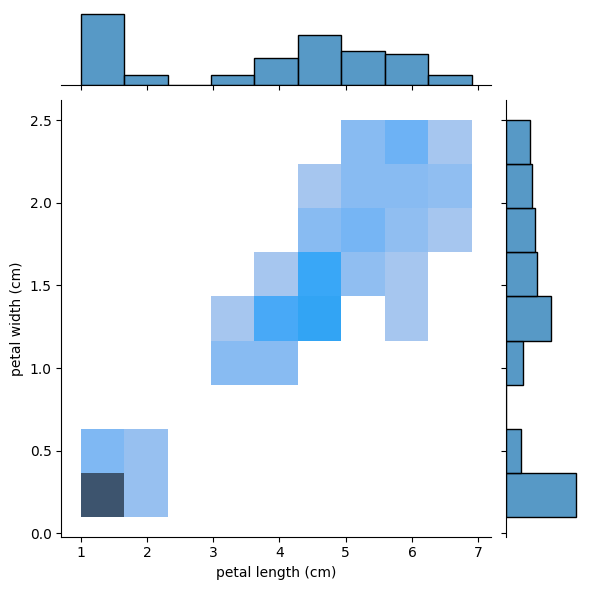

In [14]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
col_pairs = list(itertools.combinations(columns, 2))
for pair in col_pairs:
    sns.jointplot(data=df, x=pair[0], y=pair[1], kind="hist")

the following plot, statistically shows the median, first and third quarter of each column for all species

C:\Users\parsa\AppData\Local\Temp\ipykernel_34268\4099634374.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species-name', y=col, data=df, palette="Set2")
C:\Users\parsa\AppData\Local\Temp\ipykernel_34268\4099634374.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='species-name', y=col, data=df, jitter=True, palette="Pastel1")
C:\Users\parsa\AppData\Local\Temp\ipykernel_34268\4099634374.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species-name', y=col, data=df, palette="Set2")
C:\Users\parsa\AppData\Local\Temp\ipy

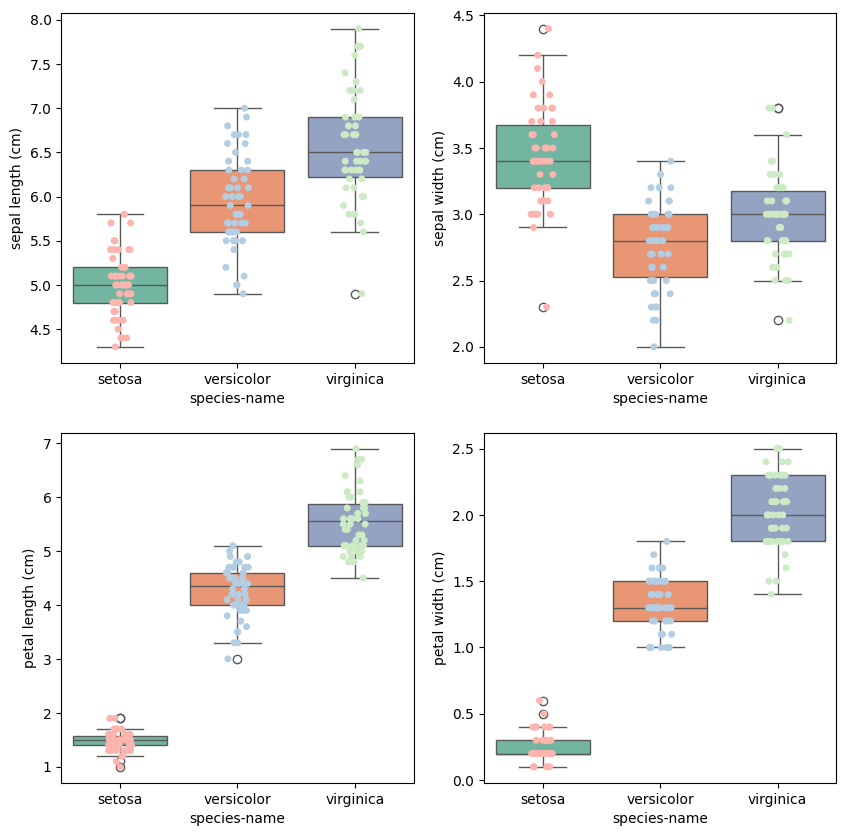

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

    
# Adding the subplot at the specified
# grid position
position = 221
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for col in columns:
    plt.subplot(position)
    sns.boxplot(x='species-name', y=col, data=df, palette="Set2")
    sns.stripplot(x='species-name', y=col, data=df, jitter=True, palette="Pastel1")
    position += 1

same plot, but with different view

C:\Users\parsa\AppData\Local\Temp\ipykernel_34268\2244059385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species-name', y=col, data=df, palette="Set2")
C:\Users\parsa\AppData\Local\Temp\ipykernel_34268\2244059385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='species-name', y=col, data=df, jitter=True, palette="Pastel1")
C:\Users\parsa\AppData\Local\Temp\ipykernel_34268\2244059385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species-name', y=col, data=df, palette="Set2")
C:\Users\parsa\AppData\Local\Temp

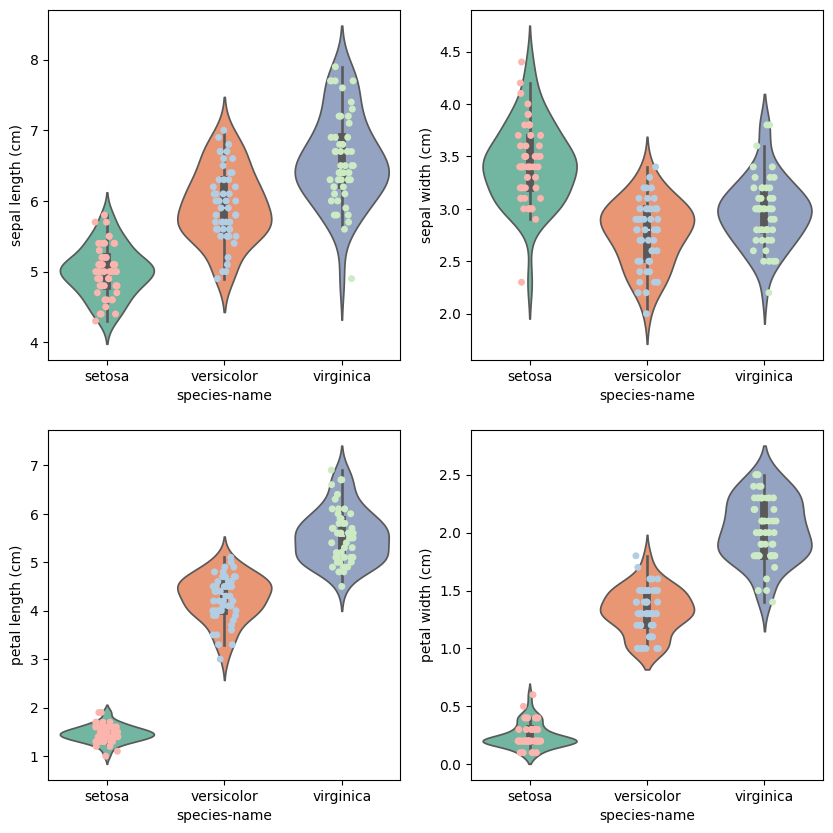

In [16]:
plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
position = 221
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for col in columns:
    plt.subplot(position)
    sns.violinplot(x='species-name', y=col, data=df, palette="Set2")
    sns.stripplot(x='species-name', y=col, data=df, jitter=True, palette="Pastel1")
    position += 1

plotting heatmap which shows the correlation of each of two columns (Pearson correlation method)

<Axes: >

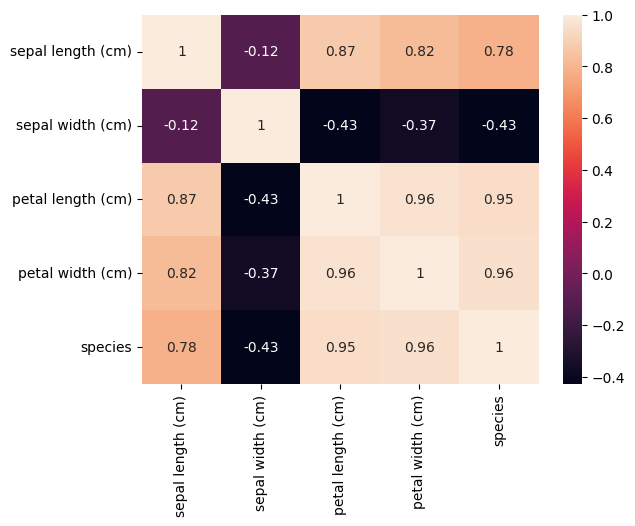

In [17]:
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson'), annot = True)

### First task

Here, we are asked to calculate one feature entropy, but we calculate them all and print their number. This is simply done by calling the 'entropy' function that we have defined on the dataset column (which is converted to numpy array).

In [18]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for col in columns:
    col_entropy = entropy(df[col].to_numpy())
    print(f'entropy of {col} is: {col_entropy}')

entropy of sepal length (cm) is: -2244.786850265658
entropy of sepal width (cm) is: -746.0363851684727
entropy of petal length (cm) is: -1176.442659547789
entropy of petal width (cm) is: -109.14457346151666


But as you can see, there are some issues here. Numbers don't seem to be correct. Why? Because as the function and formula that we had written in the previous sections, are supposed to give probability as input, the values that we had given to them, are not prtobabilities. How to correct this? We make some bins. we set the number of bins to be some constant number (which we can change it and run the code again) like 12. So, we define a variable, named `BINS_COUNT` and set its value to 12 (`BINS_COUNT=12`). And then, we make a copy from our original dataset and then make bins for each columns.

In [19]:
BINS_COUNT = 12

In [20]:
bin_df = df.copy()

for col in columns:
    bin_df['bin-'+col] = pd.cut(bin_df[col], BINS_COUNT)

bin_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species-name,bin-sepal length (cm),bin-sepal width (cm),bin-petal length (cm),bin-petal width (cm)
0,5.1,3.5,1.4,0.2,0,setosa,"(4.9, 5.2]","(3.4, 3.6]","(0.994, 1.492]","(0.0976, 0.3]"
1,4.9,3.0,1.4,0.2,0,setosa,"(4.6, 4.9]","(2.8, 3.0]","(0.994, 1.492]","(0.0976, 0.3]"
2,4.7,3.2,1.3,0.2,0,setosa,"(4.6, 4.9]","(3.0, 3.2]","(0.994, 1.492]","(0.0976, 0.3]"
3,4.6,3.1,1.5,0.2,0,setosa,"(4.296, 4.6]","(3.0, 3.2]","(1.492, 1.983]","(0.0976, 0.3]"
4,5.0,3.6,1.4,0.2,0,setosa,"(4.9, 5.2]","(3.4, 3.6]","(0.994, 1.492]","(0.0976, 0.3]"
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,"(6.4, 6.7]","(2.8, 3.0]","(4.933, 5.425]","(2.1, 2.3]"
146,6.3,2.5,5.0,1.9,2,virginica,"(6.1, 6.4]","(2.4, 2.6]","(4.933, 5.425]","(1.7, 1.9]"
147,6.5,3.0,5.2,2.0,2,virginica,"(6.4, 6.7]","(2.8, 3.0]","(4.933, 5.425]","(1.9, 2.1]"
148,6.2,3.4,5.4,2.3,2,virginica,"(6.1, 6.4]","(3.2, 3.4]","(4.933, 5.425]","(2.1, 2.3]"


Now, we calculate probabilities of these bins. We do this by getting value counts of each bin. This approach is done by `.value_counts()` function. This function, also, gets a boolean value `normalized` as an input, and if we set this to `True`, in the output, we get the probability, otherwise we would get number of repetition of each bins, and we had to divide them by the total number of ther values to convert them to probabilities. But since the function has this feature, we only use it. so the probabilities are:

In [21]:
prob = {}
for col in columns:
    prob[col] = bin_df['bin-' + col].value_counts(normalize=True).to_numpy()

str(prob)[:120] + '...' # just to avoid printing many lines

"{'sepal length (cm)': array([0.15333333, 0.14      , 0.13333333, 0.1       , 0.1       ,\n       0.09333333, 0.08666667, ..."

Now, we compute each column entropy and print their values:

In [22]:
entropies = {col: entropy(prob[col]) for col in columns}

print('entropies:')
print('\n'.join(f'{key} -> {value}' for key, value in entropies.items()))

entropies:
sepal length (cm) -> 3.3682642782281267
sepal width (cm) -> 3.098700894904152
petal length (cm) -> 3.0664355055419477
petal width (cm) -> 3.045542650260292


We can also check our entropy results with the followin code and see wheter they are correct or not. (The `base=2` part of the code is very important. Because otherwise the answer would be different)

In [23]:
import scipy.stats

lib_entropies = {col: scipy.stats.entropy([x for x in prob[col] if x != 0], base=2) for col in columns}
print('entropies with library:')
print('\n'.join(f'{key} -> {value}' for key, value in lib_entropies.items()))

entropies with library:
sepal length (cm) -> 3.3682642782281267
sepal width (cm) -> 3.098700894904153
petal length (cm) -> 3.066435505541948
petal width (cm) -> 3.0455426502602934


### Second task

Here, we are asked to calculate mutual information between any two columns in the dataset. We do this for all columns. But for this, we need joint and marginal probabilities. We are going to have an approach like the previous task, to use bins. So, we define two variables, `BINS_COUNT_X` and `BINS_COUNT_Y`, which correspond to the number of bins for each of the columns that we are going to check. Because we use the `BINS_COUNT` for each column, so, in our code, the order matters. (the pair $(col1, col2)$ and $(col2, col1)$ are different).

In [24]:
BINS_COUNT_X = 12
BINS_COUNT_Y = 12

For this purpose, we need to generate the joint distribution and marginal distribution of those two columns. For this purpose, we use the **contingency table**. The contingency table is the matrix, in the columns are y distribution and rows are the x distribution. There is a function in pandas for this action, `pd.crosstab`, which gets two columns of the data frame, and creates this table for us. Then, we can give this table as the probability matrix to the `mutual_information` function that we wrote before. then we can easily by computing marginal probabilities of this matrix, generate the x distribution and the y distribution. So, we write the following code for this purpose.

In [25]:
def generate_distributions(df, col1, col2):
    bins_df = df.copy()
    bins_df['bin-'+col1] = pd.cut(bins_df[col1], BINS_COUNT_X)
    bins_df['bin-'+col2] = pd.cut(bins_df[col2], BINS_COUNT_Y)
    # now we generate the table in the following format
    crosstab = pd.crosstab(bins_df['bin-'+col1], bins_df['bin-'+col2]).to_numpy()
    prob_matrix = crosstab / crosstab.sum().sum() # summation of all the entities in the crosstab matrix. 
    # We could also use len(df), because we know the summation of all the numbers in the crosstab matrix,
    # is equal to the length of the matrix.
    x_dist = prob_matrix.sum(axis=1) # x marginal distribution, is the summation all values in a row
    y_dist = prob_matrix.sum(axis=0) # y marginal distribution, is the summation all values in a column

    return prob_matrix, x_dist, y_dist

Now, we have to used the following code and compute mutual information between all columns.

In [26]:
mi_dict = {} # mutual information list
for col1 in columns:
    for col2 in columns:
        joint, x_dist, y_dist = generate_distributions(df, col1, col2)
        
        mi = mutual_information(joint, x_dist, y_dist)
        mi_dict[col1+' * '+col2] = mi

print('mutual-informations:')
print('\n'.join(f'{key} -> {value}' for key, value in mi_dict.items()))

mutual-informations:
sepal length (cm) * sepal length (cm) -> 3.368264278228127
sepal length (cm) * sepal width (cm) -> 0.8456783153382412
sepal length (cm) * petal length (cm) -> 1.3098422156207705
sepal length (cm) * petal width (cm) -> 1.2191121789526451
sepal width (cm) * sepal length (cm) -> 0.8456783153382411
sepal width (cm) * sepal width (cm) -> 3.098700894904152
sepal width (cm) * petal length (cm) -> 0.7804457518566044
sepal width (cm) * petal width (cm) -> 0.9136640400156502
petal length (cm) * sepal length (cm) -> 1.3098422156207703
petal length (cm) * sepal width (cm) -> 0.7804457518566045
petal length (cm) * petal length (cm) -> 3.0664355055419477
petal length (cm) * petal width (cm) -> 1.6687028891861113
petal width (cm) * sepal length (cm) -> 1.2191121789526451
petal width (cm) * sepal width (cm) -> 0.9136640400156499
petal width (cm) * petal length (cm) -> 1.6687028891861113
petal width (cm) * petal width (cm) -> 3.0455426502602925


We could have also used a library to check our answers, but, there is another way to check our answers here. We know due to the formula of the mutual information and entropy, that if we compute mutual information of something with itself, we should get its entropy:

$$I(X; X) = D_{KL}(p_X(x) || p_X(x)p_X(x)) = \sum_{x,y} p(x,y) \log{\left(\frac{p_{X}(x)}{p_X(x)p_X(x)}\right)} = 
\sum_{x,y} p(x,y) \log{\left(\frac{1}{p_X(x)}\right)} = H(X)$$

As we can see in the results of the mutual information, the mutual information of some columns with themself, is equal to the entropy of them that we calculated in the previous task. So, our computations are correct.

### Third task

Here, we are asked to calculate KL-Divergence between a feature of different species. for this, first, we separate the species data and then, calculate the KL-Divergence of the same features for each two different species. So, we separate species as follows:

In [27]:
species_df_dict = { name: group for name, group in df.groupby('species-name')}
species_names = list(species_df_dict.keys())

print('species: ', species_names)

species:  ['setosa', 'versicolor', 'virginica']


Again we define a variable called `BINS_COUNT_KL` and set its value to 6. (we can change 6 to any arbitrary number. But if its too small, like one, or two, or when it is too larg like 200, we can't have good results)

In [28]:
BINS_COUNT_KL = 6

Now, we create distribution from bint of each species and each column and then use it in the next step. The reason that we do this here, is because we can calculate this once and then use it each time, but in case that we do this in the next step, we will do this multiple times. So, we do this due to performance and time optimization. (In case that the dataset is large or having too many species, it could be good)

In [29]:
distributions = {}

for spec in species_names:
    for col in columns:
        species_df_dict[spec]['bin'+col] = pd.cut(species_df_dict[spec][col], BINS_COUNT_KL)
        distributions[col+' * '+spec] = species_df_dict[spec]['bin'+col].value_counts(normalize=True).to_numpy()
distributions

{'sepal length (cm) * setosa': array([0.24, 0.24, 0.22, 0.14, 0.1 , 0.06]),
 'sepal width (cm) * setosa': array([0.42, 0.22, 0.14, 0.14, 0.06, 0.02]),
 'petal length (cm) * setosa': array([0.4 , 0.26, 0.18, 0.08, 0.04, 0.04]),
 'petal width (cm) * setosa': array([0.58, 0.14, 0.14, 0.1 , 0.02, 0.02]),
 'sepal length (cm) * versicolor': array([0.26, 0.22, 0.2 , 0.12, 0.1 , 0.1 ]),
 'sepal width (cm) * versicolor': array([0.26, 0.24, 0.22, 0.12, 0.1 , 0.06]),
 'petal length (cm) * versicolor': array([0.38, 0.2 , 0.18, 0.12, 0.06, 0.06]),
 'petal width (cm) * versicolor': array([0.4 , 0.2 , 0.2 , 0.1 , 0.06, 0.04]),
 'sepal length (cm) * virginica': array([0.34, 0.28, 0.12, 0.12, 0.12, 0.02]),
 'sepal width (cm) * virginica': array([0.44, 0.2 , 0.18, 0.1 , 0.06, 0.02]),
 'petal length (cm) * virginica': array([0.28, 0.28, 0.2 , 0.12, 0.08, 0.04]),
 'petal width (cm) * virginica': array([0.32, 0.24, 0.22, 0.12, 0.06, 0.04])}

Now, we go through all columns, and then call the KL-Divergence function that we implemented in the previous sections and see the results. And we also like previous times, need to have some bins.

In [30]:
kl_diverg_dict = {}

for col in columns:
    for spec1 in species_names:
        for spec2 in species_names:
            p_dist = distributions[col+' * '+spec1]
            q_dist = distributions[col+' * '+spec2]

            kld = kl_divergence(p_dist, q_dist)
            kl_diverg_dict[col+' * '+spec1+' * '+spec2] = kld

print('KL-Divergence:')
print('\n'.join(f'{key} -> {value}' for key, value in kl_diverg_dict.items()))

KL-Divergence:
sepal length (cm) * setosa * setosa -> 0.0
sepal length (cm) * setosa * versicolor -> 0.019580658081457446
sepal length (cm) * setosa * virginica -> 0.1183381915407922
sepal length (cm) * versicolor * setosa -> 0.02191604657699435
sepal length (cm) * versicolor * versicolor -> 0.0
sepal length (cm) * versicolor * virginica -> 0.17611334897772626
sepal length (cm) * virginica * setosa -> 0.1013614877294492
sepal length (cm) * virginica * versicolor -> 0.12569608231719331
sepal length (cm) * virginica * virginica -> 0.0
sepal width (cm) * setosa * setosa -> 0.0
sepal width (cm) * setosa * versicolor -> 0.12689885769092185
sepal width (cm) * setosa * virginica -> 0.01926275765437481
sepal width (cm) * versicolor * setosa -> 0.13580330064138108
sepal width (cm) * versicolor * versicolor -> 0.0
sepal width (cm) * versicolor * virginica -> 0.12984025721393913
sepal width (cm) * virginica * setosa -> 0.018749472999992627
sepal width (cm) * virginica * versicolor -> 0.1270177377

We could use some external library to check whether our answer is correct or not, but we can do this in other way. We know that the KL-Divergence of something with itself is zero. And in the above results, we have zeros in place that we have computes something's KL-Divergence with itself.

# References

Some references are as follows:
- Some youtube videos (are not available at this moment, there were for exam)
- class slides & notes
- some websites for coding part and visualization (GeeksForGeeks, kaggle, stackoverflow and etc)